# Unit 5 - Financial Planning

In [141]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [142]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [143]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [144]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [145]:
# Fetch current BTC price
btc_API_response = requests.get(btc_url)

#print(btc_API_response.text)

btc_API_response_json = btc_API_response.json()
btc_API_response_json




# Fetch current ETH price
eth_API_response = requests.get(eth_url)

#print(eth_API_response.text)

eth_API_response_json = eth_API_response.json()
eth_API_response_json




# Compute current value of my crpto
current_btc_price = btc_API_response_json["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = current_btc_price * my_btc

current_eth_price = eth_API_response_json["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = current_eth_price * my_eth




# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23746.97
The current value of your 5.3 ETH is $8484.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [146]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [147]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_data = tradeapi.REST(
    alpaca_api_key,
    alpaca_api_secret_key,
    api_version="v2")

In [148]:
# Format current date as ISO format
current_day = pd.Timestamp("2022-09-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
my_portfolio = alpaca_data.get_bars(
    tickers,
    timeframe,
    start = current_day,
    end = current_day
).df

my_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = my_portfolio[my_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = my_portfolio[my_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
my_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
my_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-09-02 04:00:00+00:00  100.37  100.67  100.13  100.36  5963968   

                                                     SPY                   \
                          trade_count        vwap   open     high     low   
timestamp                                                                   
2022-09-02 04:00:00+00:00       18228  100.362232  400.3  401.555  390.33   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-09-02 04:00:00+00:00  392.24  98944421      637607  395.381705

In [149]:
# Pick AGG and SPY close prices
current_agg_price = my_portfolio["AGG"]["close"][0]
current_spy_price = my_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${current_agg_price}")
print(f"Current SPY closing price: ${current_spy_price}")

Current AGG closing price: $100.36
Current SPY closing price: $392.24


In [151]:
# Compute the current value of shares
my_agg_value = current_agg_price * my_agg
my_spy_value = current_spy_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19612.00
The current value of your 200 AGG shares is $20072.00


### Savings Health Analysis

In [169]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
member_assets_df = pd.DataFrame([my_btc_value, my_eth_value, my_agg_value, my_spy_value])
member_assets_df.set_axis(["my_btc_value", "my_eth_value", "my_agg_value", "my_spy_value"], axis="index", inplace=True)
member_assets_df.set_axis(["amount"], axis="columns", inplace=True)
member_assets_df

# Create savings DataFrame
df_savings = pd.DataFrame([(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)])
df_savings.set_axis(["crypto", "shares"], axis="index", inplace=True)
df_savings.set_axis(["amount"], axis="columns", inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
crypto,32231.261
shares,39684.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

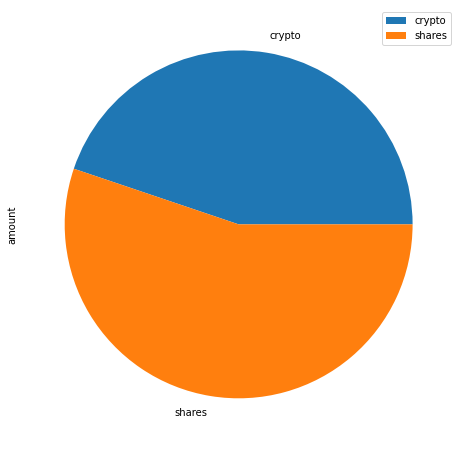

In [176]:
# Plot savings pie chart
df_savings.plot.pie(figsize=(8, 8), subplots=True)

In [205]:
# Set ideal emergency fund
months_needed = 3
emergency_fund = monthly_income * months_needed

# Calculate total amount of savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health

short_emergency_fund = emergency_fund - total_savings

if total_savings > emergency_fund:
    print(f"Congratulations!  Your current savings of ${total_savings:0.2f}, are more than sufficient in the case of an emergency.")
elif total_savings == emergency_fund:
    print(f"Your current savings of ${total_savings:0.2f}, are enough to cover you in case of an emergency - we suggest at least {months_needed} months income in an emergency fund.")
elif total_savings < emergency_fund:
    print(f"Please be aware:  Your current savings of ${total_savings:0.2f}, are not sufficient to cover you in case of an emergency - we suggest at least {months_needed} months income in an emergency fund.  In order to meet\
 this goal, you will need to save the following amount: ${short_emergency_fund:0.2f}.")


Congratulations!  Your current savings of $71915.26, are more than sufficient in the case of an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [206]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-05', tz='America/New_York').isoformat()

tickers = ["AGG", "SPY"]
timeframe = "1Day"

In [213]:
# Get 5 years' worth of historical data for SPY and AGG
stocks_and_bonds = alpaca_data.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

stocks_and_bonds

# Reorganize the DataFrame
# Separate ticker data
AGG = stocks_and_bonds[stocks_and_bonds['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stocks_and_bonds[stocks_and_bonds['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stocks_and_bonds = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
stocks_and_bonds.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-09-05 04:00:00+00:00  110.27  110.4972  110.2100  110.42  2257109   
2017-09-06 04:00:00+00:00  110.42  110.5200  110.2301  110.30  2720188   
2017-09-07 04:00:00+00:00  110.43  110.6600  110.4200  110.57  1648825   
2017-09-08 04:00:00+00:00  110.54  110.5800  110.4300  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.2900  110.1000  110.14  2492743   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-09-05 04:00:00+00:00        9512  110.379039  247.27  247.52  244.95   
2017-09-06 04:00:00+00:00       10898  110.336561  246.87  247.28  246.23   
2017-09-07 04:00:00+00:00        8838  110.539314  247.27  247.27  246.40   
2017-09-08 04:00:00+00:00        9370  110.471812  246.54  247.11  246.30   
2017-09-11 04:00:00+00:00       10614  110.194231  248.04  249.30  248.02   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-05 04:00:00+00:00  246.06  91398777      330607  246.305181  
2017-09-06 04:00:00+00:00  246.90  57916867      216152  246.817023  
2017-09-07 04:00:00+00:00  246.87  58034730      184339  246.812860  
2017-09-08 04:00:00+00:00  246.58  63832825      185692  246.653947  
2017-09-11 04:00:00+00:00  249.21  71364848      211601  248.758253

In [228]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30_year = MCSimulation(
    portfolio_data = stocks_and_bonds,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [229]:
# Printing the simulation input data
mc_30_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-09-05 04:00:00+00:00  110.27  110.4972  110.2100  110.42  2257109   
2017-09-06 04:00:00+00:00  110.42  110.5200  110.2301  110.30  2720188   
2017-09-07 04:00:00+00:00  110.43  110.6600  110.4200  110.57  1648825   
2017-09-08 04:00:00+00:00  110.54  110.5800  110.4300  110.44  2363231   
2017-09-11 04:00:00+00:00  110.27  110.2900  110.1000  110.14  2492743   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-05 04:00:00+00:00        9512  110.379039          NaN  247.27   
2017-09-06 04:00:00+00:00       10898  110.336561    -0.001087  246.87   
2017-09-07 04:00:00+00:00        8838  110.539314     0.002448  247.27   
2017-09-08 04:00:00+00:00        9370  110.471812    -0.001176  246.54   
2017-09-11 04:00:00+00:00       10614  110.194231    -0.002716  248.04   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2017-09-05 04:00:00+00:00  247.52  244.95  246.06  91398777      330607   
2017-09-06 04:00:00+00:00  247.28  246.23  246.90  57916867      216152   
2017-09-07 04:00:00+00:00  247.27  246.40  246.87  58034730      184339   
2017-09-08 04:00:00+00:00  247.11  246.30  246.58  63832825      185692   
2017-09-11 04:00:00+00:00  249.30  248.02  249.21  71364848      211601   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-05 04:00:00+00:00  246.305181          NaN  
2017-09-06 04:00:00+00:00  246.817023     0.003414  
2017-09-07 04:00:00+00:00  246.812860    -0.000122  
2017-09-08 04:00:00+00:00  246.653947    -0.001175  
2017-09-11 04:00:00+00:00  248.758253     0.010666

In [230]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Pau1Atr80s\FINTECH\FINTECH-Challenge-5\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002845,1.000017,0.992326,0.996650,0.993702,1.003051,0.993940,1.001090,0.995502,1.001288,...,1.007136,1.003666,0.993631,0.995936,0.982677,0.993661,0.988336,1.002547,0.980604,1.008040
2,1.002707,0.989948,0.984464,1.005269,0.989871,1.019222,0.990200,1.012759,1.000296,0.997531,...,1.021384,1.015232,0.988453,0.994856,0.981331,0.989685,0.983215,0.996935,0.987672,0.997428
3,1.009758,0.982311,0.988408,1.006778,0.995835,1.019797,0.988076,1.014792,1.012919,0.998872,...,1.032146,1.011795,0.977772,0.997847,0.974573,0.992618,0.984057,0.985761,0.982315,0.995018
4,1.009580,0.984726,0.980990,1.011076,0.992272,1.015798,0.987641,1.021156,1.003828,0.981739,...,1.049724,1.016514,0.974876,0.999748,0.979677,0.996125,0.984223,0.996730,0.989524,0.990861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.640524,28.481788,6.235591,17.880381,25.464831,1.702343,4.038012,4.882407,8.370179,5.269735,...,2.746174,3.299094,1.593894,19.073916,7.909688,3.133781,1.583597,2.874918,3.918830,4.255020
7557,3.601909,28.630326,6.224533,17.823702,25.544405,1.722891,4.055358,4.888048,8.403764,5.321598,...,2.750491,3.306913,1.597243,19.003412,7.953165,3.184564,1.588777,2.866594,3.896916,4.257364
7558,3.628143,29.040219,6.196525,17.743700,25.541186,1.741535,4.054108,4.851162,8.289666,5.290094,...,2.771811,3.265648,1.610945,18.925589,7.933682,3.179080,1.575199,2.844827,3.888461,4.258869
7559,3.627707,29.415138,6.117614,17.638496,25.296669,1.748603,4.033533,4.882322,8.239678,5.254401,...,2.756710,3.279987,1.618416,19.027143,7.972406,3.190056,1.567304,2.852906,3.845522,4.248618


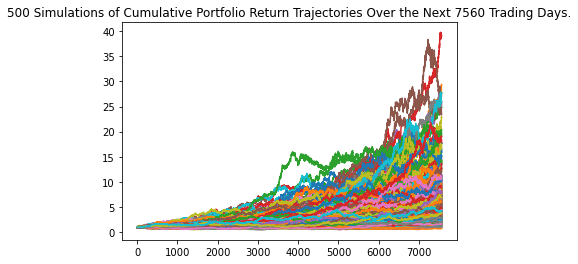

In [231]:
# Plot simulation outcomes
mc_sim_line_plot = mc_30_year.plot_simulation()
mc_sim_line_plot.get_figure().savefig("mc_30_year_sim_plot.png", bbox_inches="tight")

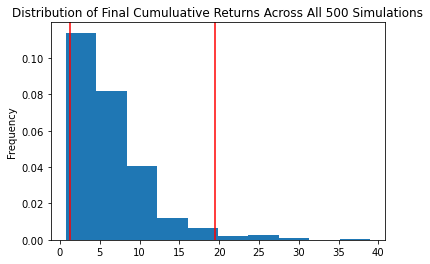

In [232]:
# Plot probability distribution and confidence intervals
mc_sim_dist_plot = mc_30_year.plot_distribution()
mc_sim_dist_plot.get_figure().savefig('mc_30_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [234]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_mc_30_year = mc_30_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_mc_30_year)

count           500.000000
mean              6.426113
std               4.882107
min               0.723625
25%               3.025990
50%               5.288433
75%               8.317833
max              38.965552
95% CI Lower      1.253135
95% CI Upper     19.422502
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [236]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
confidence_int_lower = round(summary_stats_mc_30_year[8]*initial_investment,2)
confidence_int_upper = round(summary_stats_mc_30_year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_int_lower} and ${confidence_int_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $25062.7 and $388450.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [238]:
# Set initial investment
initial_investment = int(20000 * 1.5)

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confidence_int_lower = round(summary_stats_mc_30_year[8]*initial_investment,2)
confidence_int_upper = round(summary_stats_mc_30_year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${confidence_int_lower} and ${confidence_int_upper}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 30 years will end within in the range of $37594.05 and $582675.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [239]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5_year = MCSimulation(
    portfolio_data = stocks_and_bonds,
    weights = [.10,.90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [240]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Pau1Atr80s\FINTECH\FINTECH-Challenge-5\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994993,1.006649,1.004407,0.998802,1.015174,1.022121,1.011736,1.014193,0.999928,1.011799,...,0.977378,1.002207,1.015014,1.014364,1.005061,0.995786,1.012187,0.988529,1.012754,0.984809
2,0.991690,1.003458,0.990704,1.003677,1.011832,1.008185,1.023212,1.009721,1.002798,1.022576,...,0.965433,1.019474,0.997119,1.039891,1.022710,0.995942,1.019352,0.995640,1.012514,0.978853
3,0.990515,0.974588,0.987716,1.001539,1.010986,1.029523,1.017406,1.003764,1.015976,1.027093,...,0.977719,1.004470,0.995974,1.040826,1.034672,0.987913,1.018981,1.010876,1.010896,1.003000
4,0.994362,0.996702,0.984685,1.009629,1.028414,1.027200,1.011642,0.999584,1.019107,1.026798,...,0.983535,1.017800,1.000123,1.026009,1.006790,0.979712,1.015300,0.999658,1.021018,1.009561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.533768,1.312953,1.960373,1.263030,1.453530,1.000977,1.507285,0.804666,2.011509,1.173913,...,1.283003,1.512422,2.199677,0.798502,2.256692,1.659820,3.158754,1.414606,1.623226,0.851587
1257,1.528446,1.334428,2.000554,1.254795,1.475126,0.997937,1.500239,0.790410,2.034899,1.188819,...,1.296309,1.500181,2.196932,0.804112,2.296732,1.634258,3.142909,1.411942,1.603433,0.867428
1258,1.523637,1.310131,1.995077,1.244981,1.462242,0.990048,1.489381,0.788772,2.059379,1.217653,...,1.289883,1.536130,2.183697,0.815323,2.272592,1.632351,3.198114,1.408289,1.590486,0.857705
1259,1.532632,1.332619,1.977214,1.258894,1.483727,0.985978,1.492298,0.794608,2.089041,1.238469,...,1.307969,1.531443,2.168905,0.812136,2.243193,1.639651,3.226434,1.424980,1.571703,0.848809


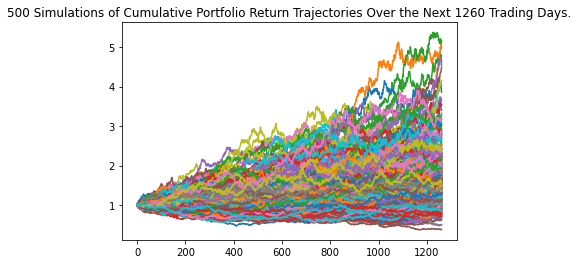

In [241]:
# Plot simulation outcomes
mc_5_sim_line_plot = mc_5_year.plot_simulation()
mc_5_sim_line_plot.get_figure().savefig("mc_5_year_sim_plot.png", bbox_inches="tight")

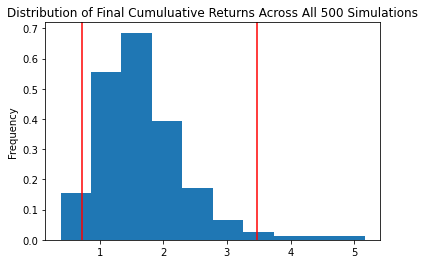

In [242]:
# Plot probability distribution and confidence intervals
mc_5_sim_dist_plot = mc_5_year.plot_distribution()
mc_5_sim_dist_plot.get_figure().savefig('mc_5_year_dist_plot.png',bbox_inches='tight')

In [243]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_mc_5_year = mc_5_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_mc_5_year)

count           500.000000
mean              1.670745
std               0.703266
min               0.384884
25%               1.177709
50%               1.556751
75%               2.004097
max               5.168825
95% CI Lower      0.729697
95% CI Upper      3.473993
Name: 1260, dtype: float64


In [244]:
# Set initial investment
initial_investment_5_year = 50000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confidence_int_lower = round(summary_stats_mc_5_year[8]*initial_investment_5_year,2)
confidence_int_upper = round(summary_stats_mc_5_year[9]*initial_investment_5_year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5_year} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${confidence_int_lower} and ${confidence_int_upper}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $36484.85 and $173699.63


### Ten Years Retirement Option

In [245]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10_year = MCSimulation(
    portfolio_data = stocks_and_bonds,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [246]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Pau1Atr80s\FINTECH\FINTECH-Challenge-5\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007962,1.006465,1.002323,0.998207,0.994042,0.991791,1.008058,1.004179,1.013598,1.000918,...,1.001154,1.002289,0.994122,0.994569,1.008364,1.003736,1.005118,1.003109,0.995874,1.003405
2,1.003302,1.003055,1.001645,1.002345,0.993077,0.990732,1.012435,1.013007,1.025115,1.001537,...,1.002698,1.011956,0.987291,0.985947,1.004620,1.007393,1.000695,1.009824,1.005435,1.002050
3,1.009007,1.013851,1.000017,1.006409,0.995521,0.994037,1.014313,1.018595,1.034336,1.002172,...,1.007363,1.023738,0.976416,1.000962,1.005653,1.013397,0.994800,1.002326,1.002858,1.003363
4,0.994759,1.003315,0.991131,1.001037,0.994822,0.995081,1.010714,1.019511,1.033528,1.003598,...,1.006527,1.015704,0.987180,0.997524,1.004597,1.024350,0.988241,0.993074,1.001123,1.005103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.625901,2.492881,3.258771,2.456226,2.392039,1.834019,2.287578,2.706427,1.093255,2.226623,...,0.815632,1.083607,0.729329,2.063433,1.213462,3.018724,0.877107,1.134992,0.961277,1.166336
2517,1.635404,2.496850,3.264722,2.450789,2.390903,1.841381,2.304071,2.699878,1.092677,2.247611,...,0.816357,1.090002,0.733381,2.058888,1.206816,2.992952,0.866481,1.128832,0.955614,1.158666
2518,1.641399,2.499132,3.264716,2.451853,2.381623,1.853226,2.310707,2.711186,1.092670,2.241246,...,0.816058,1.093350,0.731760,2.067300,1.193548,3.020591,0.866126,1.136692,0.953856,1.147010
2519,1.642144,2.502524,3.260338,2.424243,2.394334,1.863344,2.302927,2.717583,1.096639,2.222487,...,0.818962,1.091079,0.722214,2.057879,1.195395,3.010606,0.866258,1.137630,0.952973,1.148540


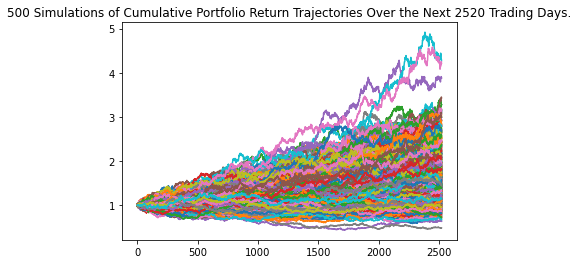

In [247]:
# Plot simulation outcomes
mc_10_sim_line_plot = mc_10_year.plot_simulation()
mc_10_sim_line_plot.get_figure().savefig("mc_10_year_sim_plot.png", bbox_inches="tight")

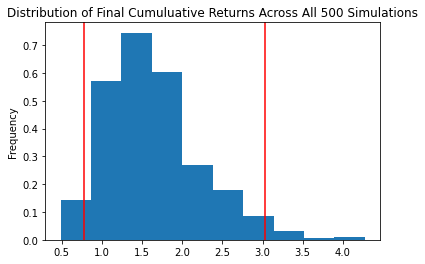

In [248]:
# Plot probability distribution and confidence intervals
mc_10_sim_dist_plot = mc_10_year.plot_distribution()
mc_10_sim_dist_plot.get_figure().savefig('mc_10_year_dist_plot.png',bbox_inches='tight')

In [249]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats_mc_10_year = mc_10_year.summarize_cumulative_return()

# Print summary statistics
print(summary_stats_mc_10_year)

count           500.000000
mean              1.637213
std               0.588074
min               0.485501
25%               1.216633
50%               1.539775
75%               1.941564
max               4.274325
95% CI Lower      0.777190
95% CI Upper      3.025645
Name: 2520, dtype: float64


In [252]:
# Set initial investment
initial_investment_10_year = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
confidence_int_lower = round(summary_stats_mc_10_year[8]*initial_investment_10_year,2)
confidence_int_upper = round(summary_stats_mc_10_year[9]*initial_investment_10_year,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10_year} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${confidence_int_lower} and ${confidence_int_upper}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 10 years will end within in the range of $58289.22 and $226923.41
